In [1]:
import pandas as pd 

In [ ]:
# import pyspark
# from pyspark.sql import SparkSession 
# spark = SparkSession.builder.master("local").appName("customer_segment_transform").getOrCreate()

In [3]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [6]:
df = pd.DataFrame(data = read_file)

In [7]:
df.rename(columns ={'Order Reference':'order_reference', 'Creation Date':'creation_date', 
                                        'Customer Name':'customer_name', 'Customer/Complete Address': 'customer_complete_address',
                                        'Customer/City': 'customer_city', 'Customer/State/State Name': 'customer_state',
                                        ' Status': 'status', 'Product name': 'product_name', 'Quantity': 'quantity', 'Unit Price': 'unit_price',
                                        'Total': 'total', 'Product Form': 'product_form', 'Product Category': 'product_category', 
                                        'Generic name': 'generic_name', 'Customer Type': 'customer_type', 'Manufacturer': 'manufacturer', 
                                        'Customer name fake': 'customer_name_fake',  'Manufacturer fake': 'manufacturer_fake',
                                        'Product name fake': 'product_name_fake', 'Product Category fake': 'product_category_fake',  
                                        'Generic name fake': 'generic_name_fake','Product Form.1': 'product_form_1'}, inplace = True)

In [8]:
pd.set_option('display.max_columns', None)

In [10]:
# check_productform.drop(check_productform.index, inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
feature_cols=["order_reference", "customer_name", "customer_city", "customer_state", "product_category", "product_name", 
      "quantity", "total", "customer_type", "product_form"]

In [13]:
x = df[feature_cols]
x.head()

,order_reference,customer_name,customer_city,customer_state,product_category,product_name,quantity,total,customer_type,product_form
0,SO61518,12 Months Pharmacy,Calabar,Crossriver,Cardiovascular Drugs,Exforge 5mg/160mg Tablets x 28'',10.0,126000.0,Pharmacy,Tablet
1,SO61518,12 Months Pharmacy,Calabar,Crossriver,Cardiovascular Drugs,Co-Diovan 160mg/12.5mg Tablets x 28'',7.0,75040.0,Pharmacy,Tablet
2,SO61258,Sky High Medical Center,Lagos,Lagos,Antimalarial Drugs,Emal-75 Injection x 3 Ampoules,20.0,33000.0,Hospital,Injectable Solution
3,SO61258,Sky High Medical Center,Lagos,Lagos,Analgesics & Antimigraine Drugs,Rexifen 400mg Capsules x 100'',3.0,3900.0,Hospital,Capsules
4,SO61258,Sky High Medical Center,Lagos,Lagos,Body Fluids & Electrolytes,Fidson 10% Dextrose Water IV 500mL,40.0,18600.0,Hospital,Solution For Intravenous Infusion


In [14]:
agg_customer = x.groupby(['customer_name', 'customer_type']).agg({
    'order_reference': 'nunique',
    'customer_city': 'nunique',
    'customer_state': 'nunique',
    'product_category': 'nunique',
    'product_name': 'nunique',
    'product_form': 'nunique',
    'quantity': 'sum',
    'total': 'sum'}).reset_index()
agg_customer.head()

,customer_name,customer_type,order_reference,customer_city,customer_state,product_category,product_name,product_form,quantity,total
0,(KI) pharmacy,Pharmacy,6,1,1,33,387,49,3858.0,3890328.50
1,12 Months Pharmacy,Pharmacy,15,1,1,14,38,18,315.0,1250948.34
2,1st Sterling Pharmacy,Pharmacy,1,1,1,19,92,21,312.0,486289.00
3,3 Dee Pharmacy,Pharmacy,39,1,1,32,479,55,2571.0,3258520.70
4,3 in one pharmacy,Pharmacy,10,1,1,16,66,24,510.0,386809.50


In [15]:
agg_customer.rename(columns ={'order_reference':'no_order', 'customer_city':'no_city', 'product_category':'no_product_category', 
                              'customer_state': 'no_state', 'product_name':'no_product_name', 'product_form': 'no_product_form',
                              'quantity': 'total_quantity', 'total': 'total_spend'}, inplace = True)

In [16]:
agg_customer.head()

,customer_name,customer_type,no_order,no_city,no_state,no_product_category,no_product_name,no_product_form,total_quantity,total_spend
0,(KI) pharmacy,Pharmacy,6,1,1,33,387,49,3858.0,3890328.50
1,12 Months Pharmacy,Pharmacy,15,1,1,14,38,18,315.0,1250948.34
2,1st Sterling Pharmacy,Pharmacy,1,1,1,19,92,21,312.0,486289.00
3,3 Dee Pharmacy,Pharmacy,39,1,1,32,479,55,2571.0,3258520.70
4,3 in one pharmacy,Pharmacy,10,1,1,16,66,24,510.0,386809.50


In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [18]:
agg_customer["customer_type_le"]= le.fit_transform(agg_customer["customer_type"])
agg_customer.head()

,customer_name,customer_type,no_order,no_city,no_state,no_product_category,no_product_name,no_product_form,total_quantity,total_spend,customer_type_le
0,(KI) pharmacy,Pharmacy,6,1,1,33,387,49,3858.0,3890328.50,2
1,12 Months Pharmacy,Pharmacy,15,1,1,14,38,18,315.0,1250948.34,2
2,1st Sterling Pharmacy,Pharmacy,1,1,1,19,92,21,312.0,486289.00,2
3,3 Dee Pharmacy,Pharmacy,39,1,1,32,479,55,2571.0,3258520.70,2
4,3 in one pharmacy,Pharmacy,10,1,1,16,66,24,510.0,386809.50,2


In [19]:
# using log/log2 for total_quantity and total_spend 
agg_customer['total_spend_log'] = np.log2(agg_customer['total_spend'])
agg_customer['total_quantity_log'] = np.log(agg_customer['total_quantity'])
agg_customer['no_product_name_log'] = np.log(agg_customer['no_product_name'])
agg_customer['no_order_log'] = np.log(agg_customer['no_order'])
agg_customer.head()

,customer_name,customer_type,no_order,no_city,no_state,no_product_category,no_product_name,no_product_form,total_quantity,total_spend,customer_type_le,total_spend_log,total_quantity_log,no_product_name_log,no_order_log
0,(KI) pharmacy,Pharmacy,6,1,1,33,387,49,3858.0,3890328.50,2,21.891461,8.257904,5.958425,1.791759
1,12 Months Pharmacy,Pharmacy,15,1,1,14,38,18,315.0,1250948.34,2,20.254591,5.752573,3.637586,2.708050
2,1st Sterling Pharmacy,Pharmacy,1,1,1,19,92,21,312.0,486289.00,2,18.891454,5.743003,4.521789,0.000000
3,3 Dee Pharmacy,Pharmacy,39,1,1,32,479,55,2571.0,3258520.70,2,21.635786,7.852050,6.171701,3.663562
4,3 in one pharmacy,Pharmacy,10,1,1,16,66,24,510.0,386809.50,2,18.561264,6.234411,4.189655,2.302585


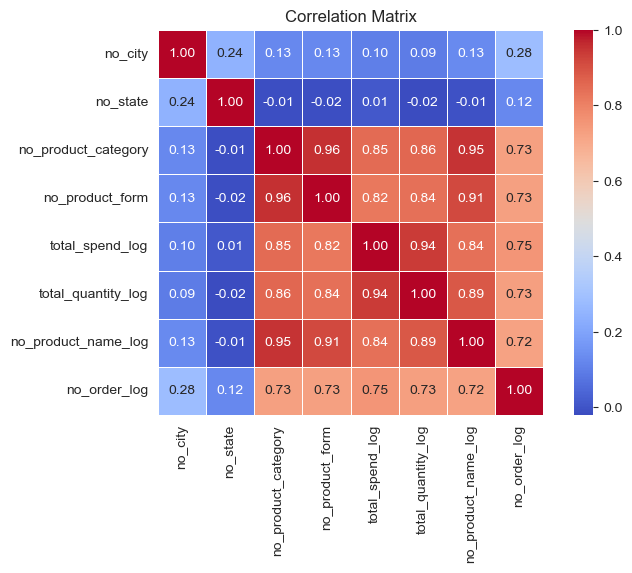

In [20]:
# before choosing the target variable, using corr matrix to evaluate each feature
# feat = agg_customer.drop(["customer_name", "customer_type"], axis=1)
corr_data = agg_customer.drop(["customer_name", "total_spend", "total_quantity","no_product_name","no_order",
                               "customer_type","customer_type_le"], axis=1)
corr_matrix = corr_data.corr() # tương quan giữ các dữ liệu số (-1 đến 1)
 
# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [21]:
corr_data.head()

,no_city,no_state,no_product_category,no_product_form,total_spend_log,total_quantity_log,no_product_name_log,no_order_log
0,1,1,33,49,21.891461,8.257904,5.958425,1.791759
1,1,1,14,18,20.254591,5.752573,3.637586,2.708050
2,1,1,19,21,18.891454,5.743003,4.521789,0.000000
3,1,1,32,55,21.635786,7.852050,6.171701,3.663562
4,1,1,16,24,18.561264,6.234411,4.189655,2.302585


In [22]:
data_choose = corr_data.drop(["no_city", "no_state"], axis=1)

In [23]:
data_choose.head()

,no_product_category,no_product_form,total_spend_log,total_quantity_log,no_product_name_log,no_order_log
0,33,49,21.891461,8.257904,5.958425,1.791759
1,14,18,20.254591,5.752573,3.637586,2.708050
2,19,21,18.891454,5.743003,4.521789,0.000000
3,32,55,21.635786,7.852050,6.171701,3.663562
4,16,24,18.561264,6.234411,4.189655,2.302585


In [24]:
# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(data_choose)
# pca = PCA(n_components=2).fit(corr_data)

In [25]:
print(pca.explained_variance_ratio_)

[0.9737823  0.01799675]


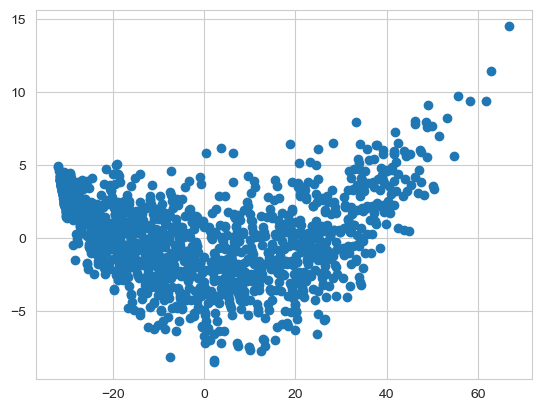

In [26]:
pca_2d = pca.transform(data_choose)
# pca_2d = pca.transform(corr_data)
import matplotlib.pyplot as plt
plt.scatter(pca_2d[:,0],pca_2d[:,1])

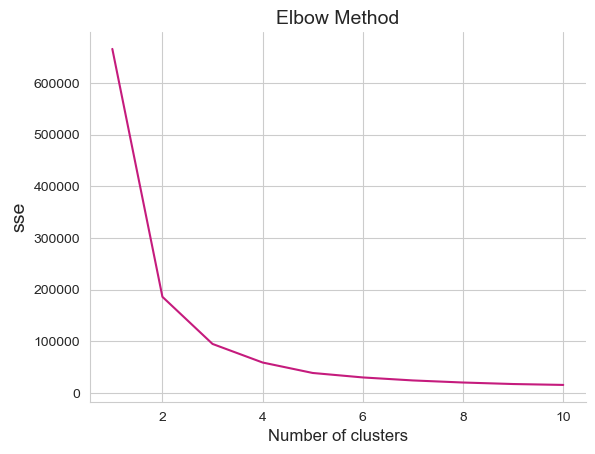

In [27]:
sse = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(pca_2d)
    sse.append(km.inertia_)
plt.plot(range(1,11),sse, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('sse', size=14)
plt.show()

In [28]:
#chon duoc so luong phan loai = 4 dua vao elbow method
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=10, n_init=10, random_state=0) 

In [29]:
y_means = kmeans.fit_predict(data_choose)
# y_means = kmeans.fit_predict(corr_data)
y_means

array([2, 0, 0, ..., 1, 3, 3])

In [30]:
centroids = pd.DataFrame(kmeans.cluster_centers_, 
                        columns = ["no_product_category", "no_product_form", "no_product_name_log", 
                                   "total_quantity_log", "total_spend_log", "no_order_log"])

centroids.index_name = "ClusterID"

centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)

centroids

,no_product_category,no_product_form,no_product_name_log,total_quantity_log,total_spend_log,no_order_log,ClusterID
0,15.529716,17.878553,19.134058,6.237255,3.987270,1.589479,0
1,26.290503,34.983240,21.126254,7.584415,5.315989,2.311869,1
2,34.594378,55.285141,22.925565,8.792178,6.283984,3.174494,2
3,4.896552,5.127321,16.503063,4.118438,1.880811,0.692257,3


In [31]:
import numpy as np
for i in centroids.columns:
    print("standard deviation of ",i, np.std(centroids[i]))

standard deviation of  no_product_category 11.18295683343738
standard deviation of  no_product_form 18.831102894555958
standard deviation of  no_product_name_log 2.3865045591238707
standard deviation of  total_quantity_log 1.7347077952483023
standard deviation of  total_spend_log 1.6508131649083098
standard deviation of  no_order_log 0.9140530145175677
standard deviation of  ClusterID 1.118033988749895


(0.0, 100000000.0)

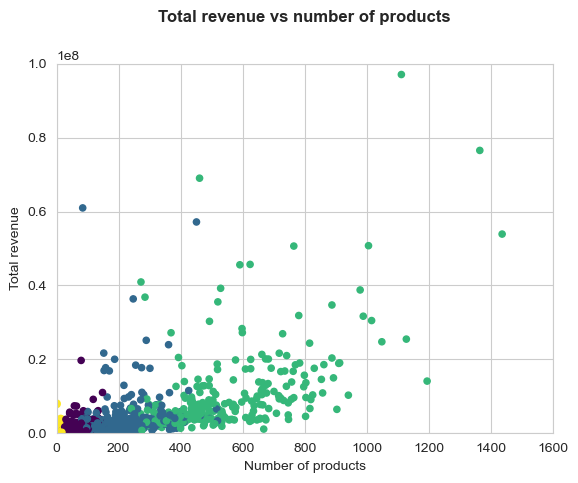

In [32]:
plt.scatter(agg_customer["no_product_name"], 
            agg_customer["total_spend"], 
            c=y_means, s=20, cmap='viridis')
plt.xlabel("Number of products")
plt.ylabel("Total revenue")
plt.title(label= "Total revenue vs number of products",
          fontsize=12,
          weight='bold', pad=30)
# limit x by -5 to 5
plt.xlim(0, 1600)
plt.ylim(0, 1*1e8)
# plt.colorbar()

In [33]:
# FILTER THEO CUSTOMER_TYPE

In [34]:
data_pharma = agg_customer 

new_column = np.array(y_means)

# Add the array as a new column
data_pharma['y_means'] = new_column
data_pharma.head()

,customer_name,customer_type,no_order,no_city,no_state,no_product_category,no_product_name,no_product_form,total_quantity,total_spend,customer_type_le,total_spend_log,total_quantity_log,no_product_name_log,no_order_log,y_means
0,(KI) pharmacy,Pharmacy,6,1,1,33,387,49,3858.0,3890328.50,2,21.891461,8.257904,5.958425,1.791759,2
1,12 Months Pharmacy,Pharmacy,15,1,1,14,38,18,315.0,1250948.34,2,20.254591,5.752573,3.637586,2.708050,0
2,1st Sterling Pharmacy,Pharmacy,1,1,1,19,92,21,312.0,486289.00,2,18.891454,5.743003,4.521789,0.000000,0
3,3 Dee Pharmacy,Pharmacy,39,1,1,32,479,55,2571.0,3258520.70,2,21.635786,7.852050,6.171701,3.663562,2
4,3 in one pharmacy,Pharmacy,10,1,1,16,66,24,510.0,386809.50,2,18.561264,6.234411,4.189655,2.302585,0


In [35]:
# FILTER PHARMACY

In [36]:
filter_pharma = data_pharma[data_pharma["customer_type"]=="Pharmacy"]
y_means_pharma = filter_pharma["y_means"]
y_means_pharma.to_numpy()

array([2, 0, 0, ..., 2, 1, 3])

(0.0, 100000000.0)

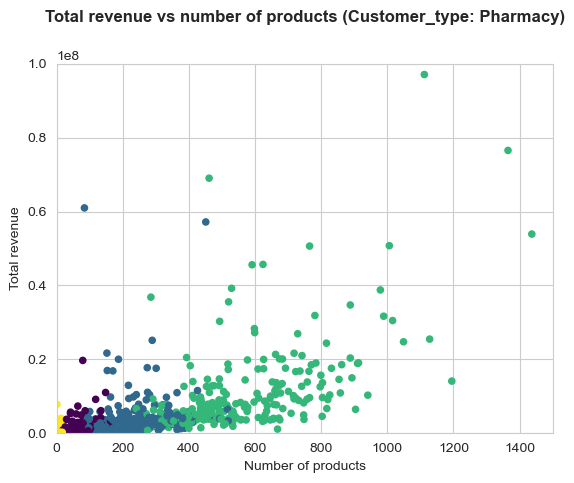

In [37]:
plt.scatter(filter_pharma["no_product_name"], 
            filter_pharma["total_spend"], 
            c=y_means_pharma, s=20, cmap='viridis')
plt.xlabel("Number of products")
plt.ylabel("Total revenue")
plt.title(label= "Total revenue vs number of products (Customer_type: Pharmacy)",
          fontsize=12,
          weight='bold', pad=30)
# limit x by -5 to 5
plt.xlim(0, 1500)
plt.ylim(0, 1*1e8)
# plt.colorbar()

In [38]:
# FILTER HOSPITAL

In [39]:
filter_hosp = data_pharma[data_pharma["customer_type"]=="Hospital"]
y_means_hosp = filter_hosp["y_means"]
y_means_hosp.to_numpy()

array([3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 2, 1, 0, 3, 0, 1, 3, 0, 0, 0, 3, 0,
       0, 0, 2, 2, 0, 0, 0, 1, 3, 3, 0, 0, 1, 0, 3, 0, 3, 3, 3, 3, 1, 3,
       3, 0, 0, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 0,
       3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 3, 0, 1, 0,
       3, 0, 1, 3, 1, 0, 0, 3, 1, 3, 0, 1, 0, 3, 0])

Text(0.5, 1.0, 'Total revenue vs number of products (Customer_type: Hospital)')

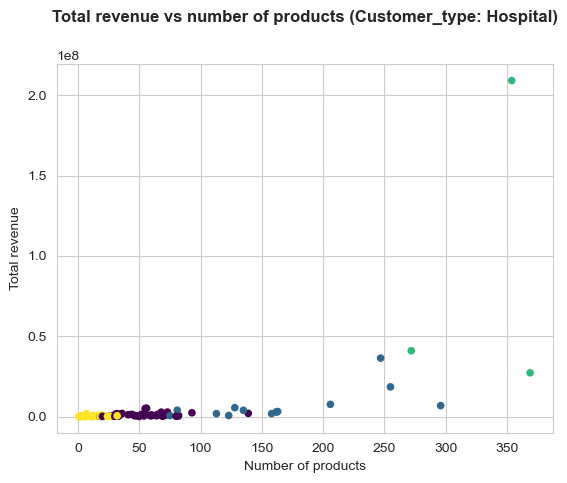

In [40]:
plt.scatter(filter_hosp["no_product_name"], 
            filter_hosp["total_spend"], 
            c=y_means_hosp, s=20, cmap='viridis')
plt.xlabel("Number of products")
plt.ylabel("Total revenue")
plt.title(label= "Total revenue vs number of products (Customer_type: Hospital)",
          fontsize=12,
          weight='bold', pad=30)
# limit x by -5 to 5
# plt.xlim(0, 1500)
# plt.ylim(0, 1*1e8)
# plt.colorbar()

In [41]:
data_final = agg_customer
data_final['Cluster'] = y_means.tolist()

In [42]:
data_final.head()

,customer_name,customer_type,no_order,no_city,no_state,no_product_category,no_product_name,no_product_form,total_quantity,total_spend,customer_type_le,total_spend_log,total_quantity_log,no_product_name_log,no_order_log,y_means,Cluster
0,(KI) pharmacy,Pharmacy,6,1,1,33,387,49,3858.0,3890328.50,2,21.891461,8.257904,5.958425,1.791759,2,2
1,12 Months Pharmacy,Pharmacy,15,1,1,14,38,18,315.0,1250948.34,2,20.254591,5.752573,3.637586,2.708050,0,0
2,1st Sterling Pharmacy,Pharmacy,1,1,1,19,92,21,312.0,486289.00,2,18.891454,5.743003,4.521789,0.000000,0,0
3,3 Dee Pharmacy,Pharmacy,39,1,1,32,479,55,2571.0,3258520.70,2,21.635786,7.852050,6.171701,3.663562,2,2
4,3 in one pharmacy,Pharmacy,10,1,1,16,66,24,510.0,386809.50,2,18.561264,6.234411,4.189655,2.302585,0,0
